## Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


## Data

In [0]:
df=pd.read_csv('network_backup_dataset.csv', sep=',')

In [0]:
df2 = df.replace({'Day of Week': {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5,
                                  'Saturday': 6, 'Sunday': 7},
                  'Work-Flow-ID': {'work_flow_0': 0, 'work_flow_1': 1, 'work_flow_2': 2, 'work_flow_3': 3,
                                   'work_flow_4': 4},
                  'File Name': {'File_0': 0, 'File_1': 1, 'File_2': 2, 'File_3': 3, 'File_4': 4, 'File_5': 5,
                                'File_6': 6, 'File_7': 7, 'File_8': 8, 'File_9': 9, 'File_10': 10, 'File_11': 11,
                                'File_12': 12, 'File_13': 13, 'File_14': 14, 'File_15': 15, 'File_16': 16,
                                'File_17': 17, 'File_18': 18, 'File_19': 19, 'File_20': 20, 'File_21': 21,
                                'File_22': 22, 'File_23': 23, 'File_24': 24, 'File_25': 25, 'File_26': 26, 'File_27': 27,
                                'File_28': 28, 'File_29': 29, }})

In [0]:
X = df2.iloc[:, [0, 1, 2, 3, 4]].values
y = df2.iloc[:, 5].values

## Question 2c: Neural network Regression Model

In [0]:
onehotenc = OneHotEncoder()
X_one = onehotenc.fit_transform(X).toarray()

relu
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
52
57
62
67
72
77
82
87
92
97
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
Minimum Test RMSE:  0.0878631217196329
Hidden units :  240
Minimum Train RMSE:  0.08368153329405187
Hidden units:  200


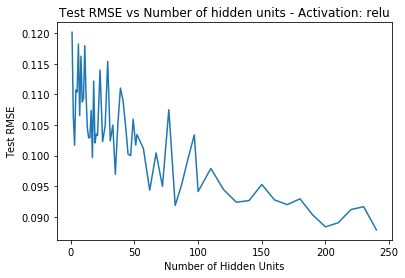

logistic
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
52
57
62
67
72
77
82
87
92
97
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
Minimum Test RMSE:  0.087204778580859
Hidden units :  62
Minimum Train RMSE:  0.08703274391548264
Hidden units:  62


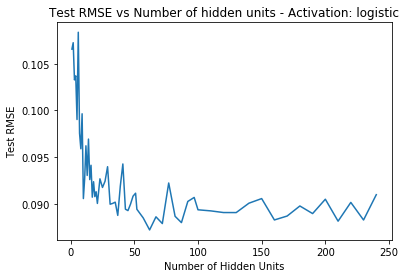

tanh
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49
51
52
57
62
67
72
77
82
87
92
97
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
Minimum Test RMSE:  0.08366827735525761
Hidden units :  160
Minimum Train RMSE:  0.08154969401464006
Hidden units:  160


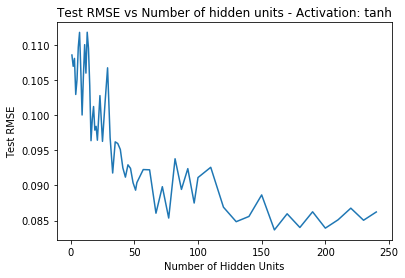

In [0]:
hidden_units = list(range(1, 21)) + list(range(21, 52, 2)) + list(range(52, 100, 5)) + list(range(100, 250, 10))

activations = ['relu', 'logistic', 'tanh']

kf = KFold(n_splits=10)
for activation in activations:
    print(activation)
    avg_test_rmse = list()
    avg_train_rmse = list()
    for i in hidden_units:
        print(i, )
        test_rmse = 0
        train_rmse = 0
        for trainset_index, testset_index in kf.split(X_one):
            X_train, X_test = X_one[trainset_index], X_one[testset_index]
            y_train, y_test = y[trainset_index], y[testset_index]

            reg = MLPRegressor(hidden_layer_sizes=(i, ), activation=activation, random_state=42)
            reg.fit(X_train, y_train)
            y_pred = reg.predict(X_test)
            y_train_pred = reg.predict(X_train)
            
            train_rmse += mean_squared_error(y_train, y_train_pred)
            test_rmse = test_rmse + mean_squared_error(y_test, y_pred)
        
        avg_test_rmse.append(math.sqrt(test_rmse/10.0))
        avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    
    print("Minimum Test RMSE: ", min(avg_test_rmse))
    print("Hidden units : ", hidden_units[avg_test_rmse.index(min(avg_test_rmse))])
    print("Minimum Train RMSE: ", min(avg_train_rmse))
    print("Hidden units: ", hidden_units[avg_train_rmse.index(min(avg_train_rmse))])
    plt.title('Test RMSE vs Number of hidden units - Activation: ' + str(activation))
    plt.plot(hidden_units, avg_test_rmse)
    plt.xlabel('Number of Hidden Units')
    plt.ylabel('Test RMSE')
    plt.show()

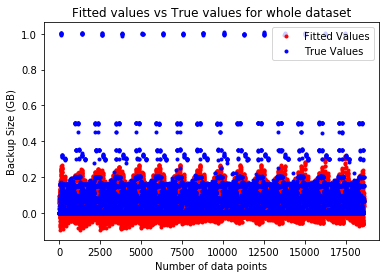

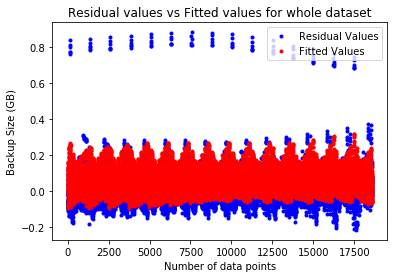

In [0]:
# Hidden units: 231, activation = 'relu'
reg = MLPRegressor(hidden_layer_sizes=(160, ), activation='tanh', random_state=42)
reg.fit(X, y)
y_pred_whole = reg.predict(X)

plt.title('Fitted values vs True values for whole dataset')
plt.plot(y_pred_whole, 'r.', label='Fitted Values')
plt.plot(y, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for whole dataset')
plt.plot(y-y_pred_whole, 'b.', label='Residual Values')
plt.plot(y_pred_whole, 'r.', label='Fitted Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

## Question 2d (i): Linear Regression for separate workflows

In [0]:
X = df2.iloc[:, [0, 1, 2, 3, 4]].values
y = df2.iloc[:, 5].values

X0, y0 = [], []
X1, y1 = [], []
X2, y2 = [], []
X3, y3 = [], []
X4, y4 = [], []

for i in range(len(X)):
    if X[i][3] == 0:
        X0.append(X[i])
        y0.append(y[i])
    if X[i][3] == 1:
        X1.append(X[i])
        y1.append(y[i])
    if X[i][3] == 2:
        X2.append(X[i])
        y2.append(y[i])
    if X[i][3] == 3:
        X3.append(X[i])
        y3.append(y[i])
    if X[i][3] == 4:
        X4.append(X[i])
        y4.append(y[i])
        
X0 = np.array(X0)
X1 = np.array(X1)
X2 = np.array(X2)
X3 = np.array(X3)
X4 = np.array(X4)

y0 = np.array(y0)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)

In [0]:
from sklearn.model_selection import cross_val_predict, cross_val_score
lm = LinearRegression()

X = df2.iloc[:, [0, 1, 2, 3, 4]].values
y = df2.iloc[:, 5].values

cv_scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

# model = lm.fit(X, y)
# y_pred = model.predict(X)

# rmse = math.sqrt(mean_squared_error(y, y_pred))

# print(rmse)


Average RMSE:  0.103675847676
Best RMSE:  0.0999471208611


Workflow-0
Average RMSE:  0.0358869702489
Best RMSE:  0.0340834964739


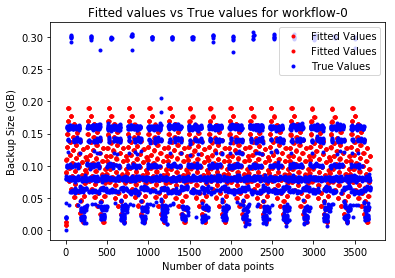

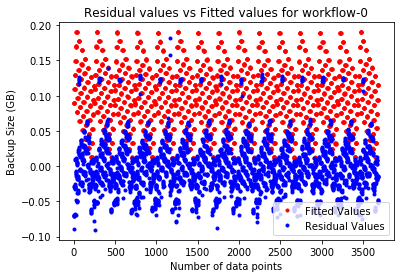

Workflow-1
Average RMSE:  0.148918602014
Best RMSE:  0.123710561768


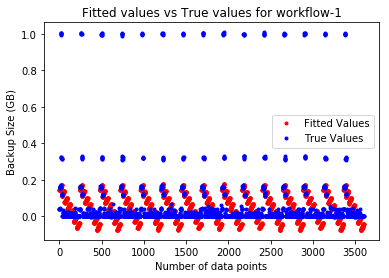

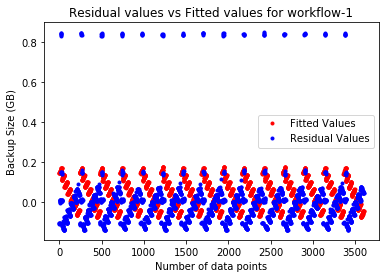

Workflow-2
Average RMSE:  0.0430669058479
Best RMSE:  0.0354878192652


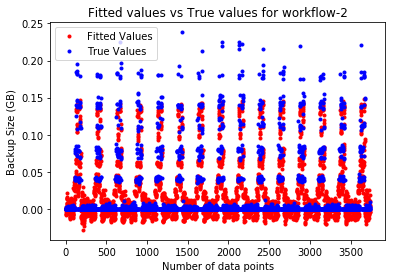

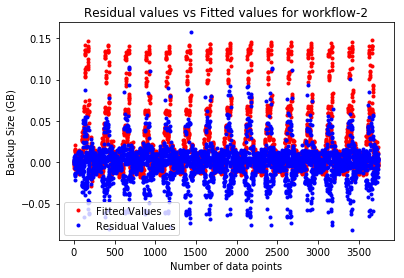

Workflow-3
Average RMSE:  0.0072608942421
Best RMSE:  0.00567623648231


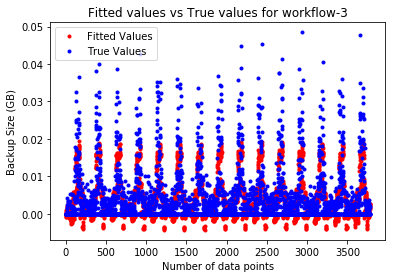

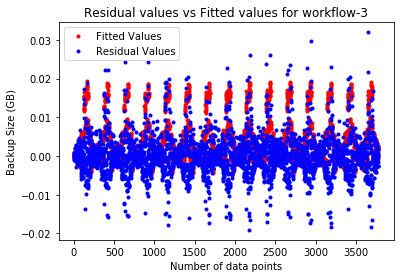

Workflow-4
Average RMSE:  0.0859906141157
Best RMSE:  0.073903648246


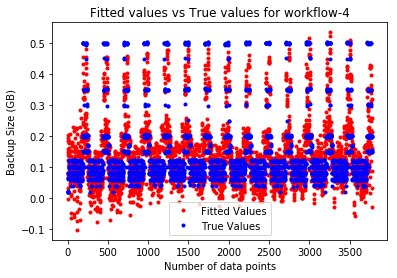

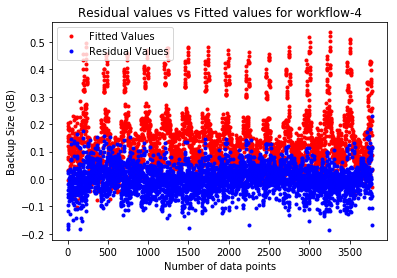

In [0]:
## Q2-d-i
from sklearn.model_selection import cross_val_predict, cross_val_score

lm = LinearRegression()

# Workflow-0

print("Workflow-0")

y0_pred = cross_val_predict(lm, X0, y0, cv=10)
cv_scores = cross_val_score(lm, X0, y0, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

plt.title('Fitted values vs True values for workflow-0')
plt.plot(y0_pred, 'r.', label='Fitted Values')
plt.plot(y0, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-0')
plt.plot(y0_pred, 'r.', label='Fitted Values')
plt.plot(y0-y0_pred, 'b.', label='Residual Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

# Workflow-1
print("Workflow-1")

y1_pred = cross_val_predict(lm, X1, y1, cv=10)
cv_scores = cross_val_score(lm, X1, y1, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

plt.title('Fitted values vs True values for workflow-1')
plt.plot(y1_pred, 'r.', label='Fitted Values')
plt.plot(y1, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-1')
plt.plot(y1_pred, 'r.', label='Fitted Values')
plt.plot(y1-y1_pred, 'b.', label='Residual Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

# Workflow-2
print("Workflow-2")

y0_pred = cross_val_predict(lm, X2, y2, cv=10)
cv_scores = cross_val_score(lm, X2, y2, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

plt.title('Fitted values vs True values for workflow-2')
plt.plot(y2_pred, 'r.', label='Fitted Values')
plt.plot(y2, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-2')
plt.plot(y2_pred, 'r.', label='Fitted Values')
plt.plot(y2-y2_pred, 'b.', label='Residual Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

# Workflow-3
print("Workflow-3")

y0_pred = cross_val_predict(lm, X3, y3, cv=10)
cv_scores = cross_val_score(lm, X3, y3, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

plt.title('Fitted values vs True values for workflow-3')
plt.plot(y3_pred, 'r.', label='Fitted Values')
plt.plot(y3, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-3')
plt.plot(y3_pred, 'r.', label='Fitted Values')
plt.plot(y3-y3_pred, 'b.', label='Residual Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

# Workflow-4
print("Workflow-4")

y0_pred = cross_val_predict(lm, X4, y4, cv=10)
cv_scores = cross_val_score(lm, X4, y4, cv=10, scoring='neg_mean_squared_error')
print ('Average RMSE: ', (sum(cv_scores)/-10.0)**0.5)
print ('Best RMSE: ', np.min((-1 * cv_scores)**0.5))

plt.title('Fitted values vs True values for workflow-4')
plt.plot(y4_pred, 'r.', label='Fitted Values')
plt.plot(y4, 'b.', label='True Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-4')
plt.plot(y4_pred, 'r.', label='Fitted Values')
plt.plot(y4-y4_pred, 'b.', label='Residual Values')
plt.xlabel('Number of data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

## Question 2d (ii): Polynomial Regression for separate workflows

Workflow-0
1
2
3
4
5
6
7
8
9
10
Minimum Test RMSE:  0.011987087249373397
Degree :  7
Minimum Train RMSE:  0.007269832968720825
Degree:  10


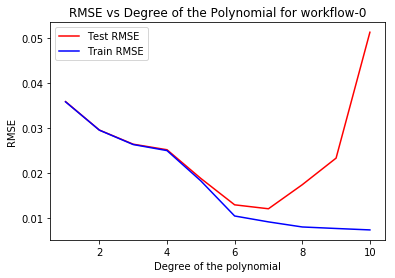

Workflow-1
1
2
3
4
5
6
7
8
9
10
Minimum Test RMSE:  0.014308550647020657
Degree :  9
Minimum Train RMSE:  0.005235931211226135
Degree:  10


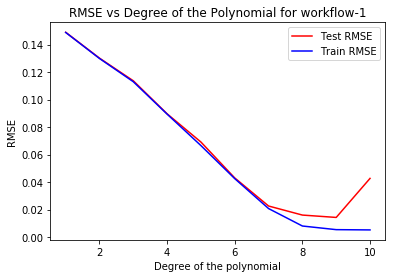

Workflow-2
1
2
3
4
5
6
7
8
9
10
Minimum Test RMSE:  0.025567754743711785
Degree :  6
Minimum Train RMSE:  0.01736336072272044
Degree:  10


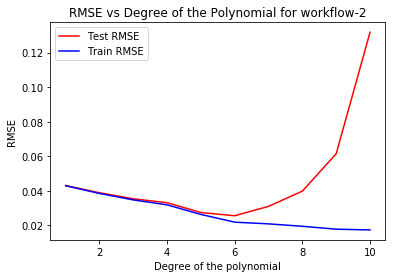

Workflow-3
1
2
3
4
5
6
7
8
9
10
Minimum Test RMSE:  0.005090650327578261
Degree :  5
Minimum Train RMSE:  0.004258725110462207
Degree:  8


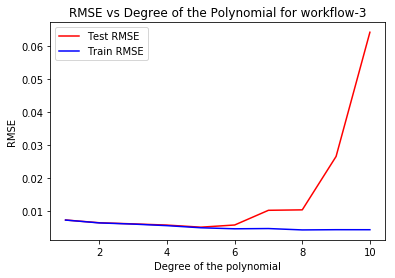

Workflow-4
1
2
3
4
5
6
7
8
9
10
Minimum Test RMSE:  0.04871243762525893
Degree :  5
Minimum Train RMSE:  0.015380878322648166
Degree:  10


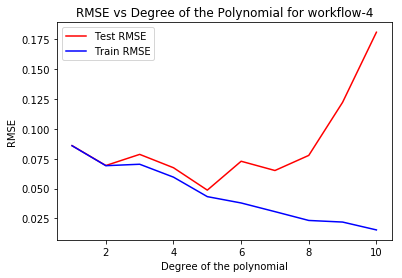

In [0]:
# # Q2-d-ii

kf = KFold(n_splits=10)
lm = LinearRegression()


degree = range(1, 11)

# Workflow-0
print("Workflow-0")

avg_train_rmse = []
avg_test_rmse = []

for i in degree:
    print(i)
    
    poly = PolynomialFeatures(i)
    X_p = poly.fit_transform(X0)

    train_rmse = 0
    test_rmse = 0
    for trainset_index, testset_index in kf.split(X0):
        X_train, X_test = X_p[trainset_index], X_p[testset_index]
        y_train, y_test = y0[trainset_index], y0[testset_index]

        model = lm.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        train_rmse += mean_squared_error(y_train, y_train_pred)
        test_rmse += mean_squared_error(y_test, y_test_pred)

    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print("Minimum Test RMSE: ", min(avg_test_rmse))
print("Degree : ", degree[avg_test_rmse.index(min(avg_test_rmse))])    
print("Minimum Train RMSE: ", min(avg_train_rmse))
print("Degree: ", degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Degree of the Polynomial for workflow-0')
plt.plot(degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Degree of the polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()


#Workflow-1
print("Workflow-1")

avg_train_rmse = []
avg_test_rmse = []

for i in degree:
    print(i)
    
    poly = PolynomialFeatures(i)
    X_p = poly.fit_transform(X1)

    train_rmse = 0
    test_rmse = 0
    for trainset_index, testset_index in kf.split(X1):
        X_train, X_test = X_p[trainset_index], X_p[testset_index]
        y_train, y_test = y1[trainset_index], y1[testset_index]

        model = lm.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        train_rmse += mean_squared_error(y_train, y_train_pred)
        test_rmse += mean_squared_error(y_test, y_test_pred)

    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print("Minimum Test RMSE: ", min(avg_test_rmse))
print("Degree : ", degree[avg_test_rmse.index(min(avg_test_rmse))])    
print("Minimum Train RMSE: ", min(avg_train_rmse))
print("Degree: ", degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Degree of the Polynomial for workflow-1')
plt.plot(degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Degree of the polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Workflow-2
print("Workflow-2")

avg_train_rmse = []
avg_test_rmse = []

for i in degree:
    print(i)
    
    poly = PolynomialFeatures(i)
    X_p = poly.fit_transform(X2)

    train_rmse = 0
    test_rmse = 0
    for trainset_index, testset_index in kf.split(X2):
        X_train, X_test = X_p[trainset_index], X_p[testset_index]
        y_train, y_test = y2[trainset_index], y2[testset_index]

        model = lm.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        train_rmse += mean_squared_error(y_train, y_train_pred)
        test_rmse += mean_squared_error(y_test, y_test_pred)

    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print("Minimum Test RMSE: ", min(avg_test_rmse))
print("Degree : ", degree[avg_test_rmse.index(min(avg_test_rmse))])    
print("Minimum Train RMSE: ", min(avg_train_rmse))
print("Degree: ", degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Degree of the Polynomial for workflow-2')
plt.plot(degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Degree of the polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Workflow-3 
print("Workflow-3")

avg_train_rmse = []
avg_test_rmse = []

for i in degree:
    print(i)
    
    poly = PolynomialFeatures(i)
    X_p = poly.fit_transform(X3)

    train_rmse = 0
    test_rmse = 0
    for trainset_index, testset_index in kf.split(X3):
        X_train, X_test = X_p[trainset_index], X_p[testset_index]
        y_train, y_test = y3[trainset_index], y3[testset_index]

        model = lm.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        train_rmse += mean_squared_error(y_train, y_train_pred)
        test_rmse += mean_squared_error(y_test, y_test_pred)

    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print("Minimum Test RMSE: ", min(avg_test_rmse))
print("Degree : ", degree[avg_test_rmse.index(min(avg_test_rmse))])    
print("Minimum Train RMSE: ", min(avg_train_rmse))
print("Degree: ", degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Degree of the Polynomial for workflow-3')
plt.plot(degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Degree of the polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()


# Workflow-4
print("Workflow-4")


avg_train_rmse = []
avg_test_rmse = []

for i in degree:
    print(i)
    
    poly = PolynomialFeatures(i)
    X_p = poly.fit_transform(X4)

    train_rmse = 0
    test_rmse = 0
    for trainset_index, testset_index in kf.split(X4):
        X_train, X_test = X_p[trainset_index], X_p[testset_index]
        y_train, y_test = y4[trainset_index], y4[testset_index]

        model = lm.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        train_rmse += mean_squared_error(y_train, y_train_pred)
        test_rmse += mean_squared_error(y_test, y_test_pred)

    avg_train_rmse.append(math.sqrt(train_rmse/10.0))
    avg_test_rmse.append(math.sqrt(test_rmse/10.0))
    
print("Minimum Test RMSE: ", min(avg_test_rmse))
print("Degree : ", degree[avg_test_rmse.index(min(avg_test_rmse))])    
print("Minimum Train RMSE: ", min(avg_train_rmse))
print("Degree: ", degree[avg_train_rmse.index(min(avg_train_rmse))])
plt.title('RMSE vs Degree of the Polynomial for workflow-4')
plt.plot(degree, avg_test_rmse, 'r', label='Test RMSE')
plt.plot(degree, avg_train_rmse, 'b', label='Train RMSE')
plt.xlabel('Degree of the polynomial')
plt.ylabel('RMSE')
plt.legend()
plt.show()


Workflow-0, Degree: 7


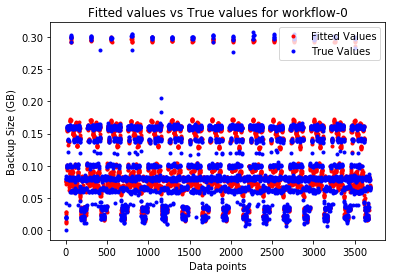

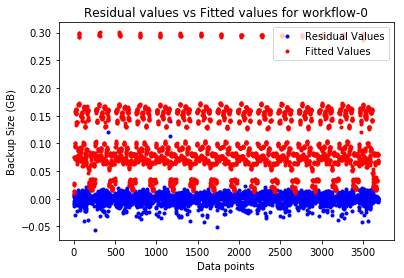

Workflow-1, Degree: 9


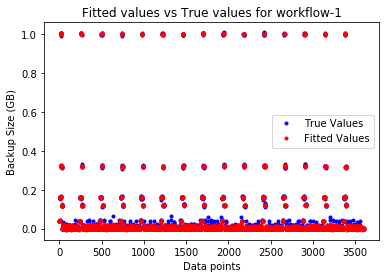

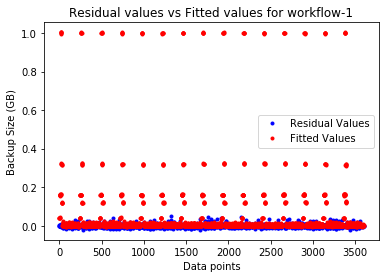

Workflow-2, Degree: 6


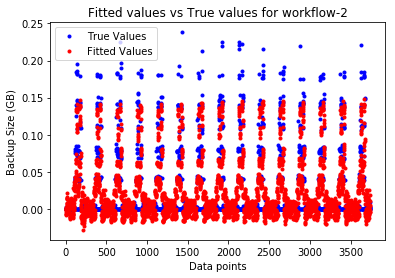

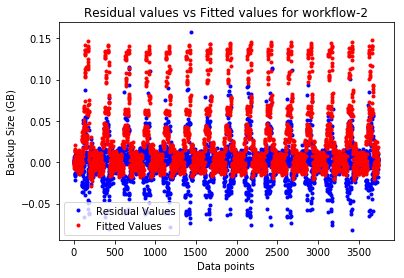

Workflow-3, Degree: 5


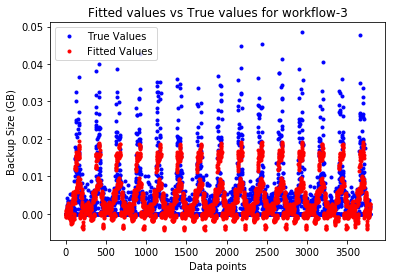

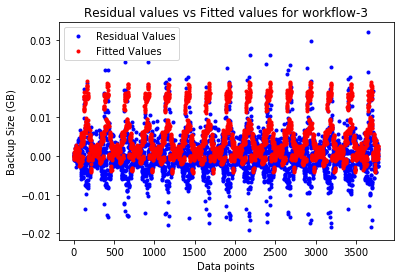

Workflow-4, Degree: 5


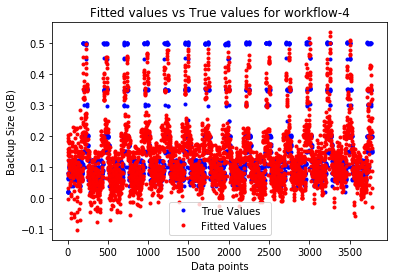

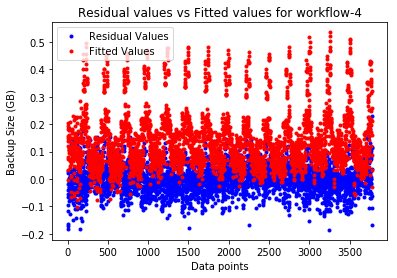

In [0]:
lm = LinearRegression()

#Workflow-0
print("Workflow-0, Degree: 7")

poly = PolynomialFeatures(7)
X0_p = poly.fit_transform(X0)

model = lm.fit(X0_p, y0)
y0_pred = model.predict(X0_p)

plt.title('Fitted values vs True values for workflow-0')
plt.plot(y0_pred, 'r.', label='Fitted Values')
plt.plot(y0, 'b.', label='True Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-0')
plt.plot(y0-y0_pred, 'b.', label='Residual Values')
plt.plot(y0_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

#Workflow-1
print("Workflow-1, Degree: 9")

poly = PolynomialFeatures(9)
X1_p = poly.fit_transform(X1)

model = lm.fit(X1_p, y1)
y1_pred = model.predict(X1_p)

plt.title('Fitted values vs True values for workflow-1')
plt.plot(y1, 'b.', label='True Values')
plt.plot(y1_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-1')
plt.plot(y1-y1_pred, 'b.', label='Residual Values')
plt.plot(y1_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

#Workflow-2
print("Workflow-2, Degree: 6")

poly = PolynomialFeatures(6)
X2_p = poly.fit_transform(X2)

model = lm.fit(X2_p, y2)
y2_pred = model.predict(X2_p)

plt.title('Fitted values vs True values for workflow-2')
plt.plot(y2, 'b.', label='True Values')
plt.plot(y2_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-2')
plt.plot(y2-y2_pred, 'b.', label='Residual Values')
plt.plot(y2_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

#Workflow-3
print("Workflow-3, Degree: 5")

poly = PolynomialFeatures(5)
X3_p = poly.fit_transform(X3)

model = lm.fit(X3_p, y3)
y3_pred = model.predict(X3_p)

plt.title('Fitted values vs True values for workflow-3')
plt.plot(y3, 'b.', label='True Values')
plt.plot(y3_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-3')
plt.plot(y3-y3_pred, 'b.', label='Residual Values')
plt.plot(y3_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

#Workflow-4
print("Workflow-4, Degree: 5")

poly = PolynomialFeatures(5)
X4_p = poly.fit_transform(X4)

model = lm.fit(X4_p, y4)
y4_pred = model.predict(X4_p)

plt.title('Fitted values vs True values for workflow-4')
plt.plot(y4, 'b.', label='True Values')
plt.plot(y4_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()

plt.title('Residual values vs Fitted values for workflow-4')
plt.plot(y4-y4_pred, 'b.', label='Residual Values')
plt.plot(y4_pred, 'r.', label='Fitted Values')
plt.xlabel('Data points')
plt.ylabel('Backup Size (GB)')
plt.legend()
plt.show()